## 다중선형회귀
* 특성을 1개가 아닌 2개 이상 사용해볼거얌
* 특성을 새롭게 만들거나 추가하는 것을 -> 특성공학
  * sklearn에서 제공하는 변환기(transformer)는 특성을 새롭게 만들거나 추가하거나 데이터를 전처리하기 위한 클래스임
* 오버피팅을 줄이기 위한 방법 사용하보자전거
  * 릿지(ridge) : 선형회귀 + 규제(제곱)
  * 라쏘(rasso) : 선형회귀 + 규제(절댓값)

### 1.데이터준비

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
)

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target=train_test_split(perch_full, perch_weight, random_state=42)


### 2.사이킷런의 변환기
* 특성을 추가해보자

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(include_bias=False) #계수값에 곱해지는 x**0인 1 값 제외)
train_poly=poly.fit_transform(train_input)
print(train_poly.shape)

(42, 9)


In [5]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [6]:
test_poly=poly.fit_transform(test_input)

### 3.다중회귀모델 훈련

In [7]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(test_poly, test_target))

0.9714559911594111


In [8]:
#한번 특성을 좀 더 늘려볼까???

poly=PolynomialFeatures(degree=5, include_bias=False)
train_poly=poly.fit_transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [9]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#어마맛 점수가 -가 나옴!!!!! 오버피팅!!!!!

0.9999999999996433
-144.40579436844948


### 4.오버피팅 줄이는 방법(규제)
* 우선 각 특성의 스케일을 좀 맞춰주는 작업 실시
* 여기서 train은 fit을 하고 transform을 하는데 test는 fit을 안하고 transform을 한다?
  * 훈련 데이터셋을 기준으로 transform을 하기 위해서
  * 테스트 데이터에 fit을 다시 하게 되면 새로운 평균과 표준편차가 계산되는데, 이는 훈련 데이터와 테스트 데이터의 변환 기준이 달라지는 결과를 초래


In [10]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

#### 릿지(Ridge) 회귀

In [11]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


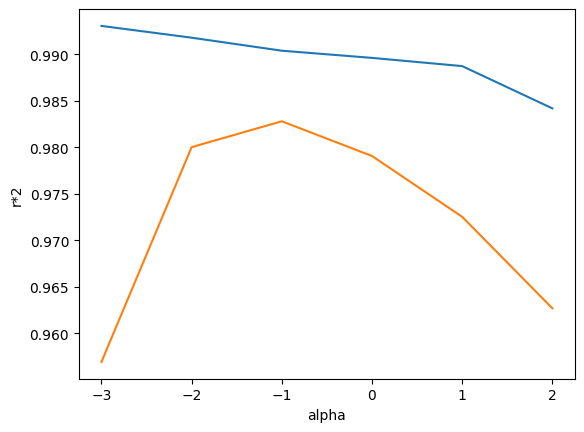

In [12]:
import matplotlib.pyplot as plt

train_score=[]
test_score=[]

alpha_list=[0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha_list:
  ridge=Ridge(alpha=i)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))


plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('r*2')
plt.show()

In [13]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


#### 라쏘(Lasso)회귀

In [14]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

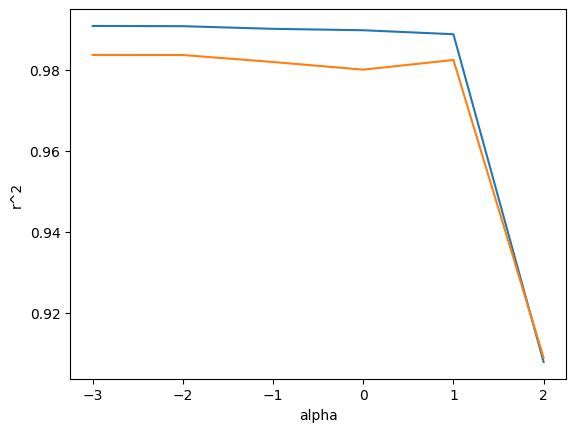

In [15]:
train_score=[]
test_score=[]

alpha_list=[0.001, 0.01, 0.1, 1, 10, 100]

for i in alpha_list:
  lasso=Lasso(alpha=i)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('r^2')
plt.show()

In [16]:
lasso=Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


## 정리
* 다중선형회귀 -> 특성을 2개 이상 사용해서 예측하는 선형회귀
* 특성공학 -> 기존의 특성을 기반으로 새로운 특성을 만드는 방법
  * 사이킷런에서는 변환기 클래스를 사용해서 만듦
* 오버피팅 줄이는 방법
  * 선형회귀에서는 릿지회귀, 라쏘회귀가 있음 (둘다 규제를 추가한것)